<a href="https://colab.research.google.com/github/SamuelMbogo/Colab_projects/blob/main/Power_Law_Dynamics_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Install yfinance
!pip install yfinance --quiet

# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download Bitcoin price data
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2024-12-31')

# Flatten the MultiIndex columns
btc_data.columns = ['_'.join(col).strip() for col in btc_data.columns]

# Reset the index to create a 'Date' column
btc_data = btc_data.reset_index()

# Rename columns to be more intuitive
column_mapping = {
    'Date': 'Date',
    'Open_BTC-USD': 'Open',
    'High_BTC-USD': 'High',
    'Low_BTC-USD': 'Low',
    'Close_BTC-USD': 'Close',
    'Adj Close_BTC-USD': 'Adj_Close',
    'Volume_BTC-USD': 'Volume'
}
btc_data = btc_data.rename(columns=column_mapping)

# Convert Date to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Calculate days since first date
btc_data['Days'] = (btc_data['Date'] - btc_data['Date'].min()).dt.days

# Filter out invalid data
btc_data = btc_data[(btc_data['Close'] > 0) & (btc_data['Days'] > 0)]

# Log transformation
btc_data['Log_Days'] = np.log(btc_data['Days'])
btc_data['Log_Close'] = np.log(btc_data['Close'])

# Print first few rows to verify
print(btc_data[['Date', 'Days', 'Close', 'Log_Days', 'Log_Close']].head())

[*********************100%***********************]  1 of 1 completed

        Date  Days       Close  Log_Days  Log_Close
1 2014-09-18     1  424.440002  0.000000   6.050771
2 2014-09-19     2  394.795990  0.693147   5.978369
3 2014-09-20     3  408.903992  1.098612   6.013480
4 2014-09-21     4  398.821014  1.386294   5.988513
5 2014-09-22     5  402.152008  1.609438   5.996830


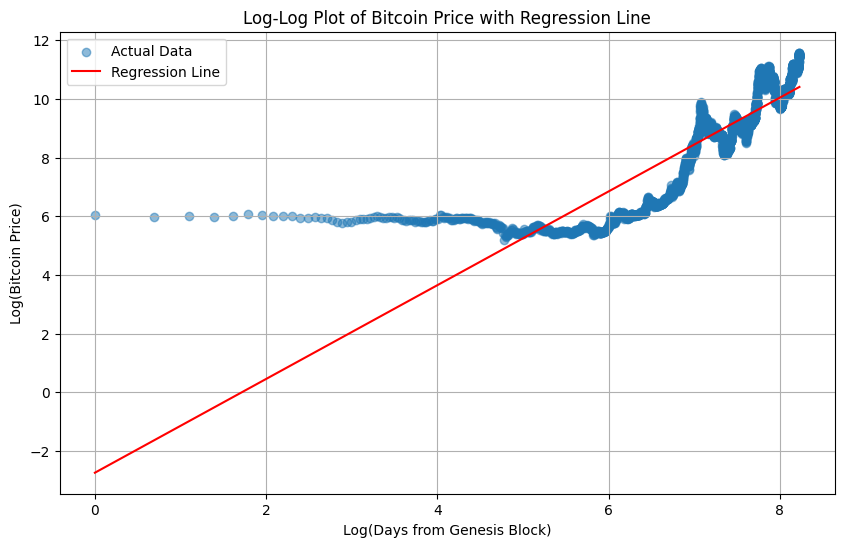

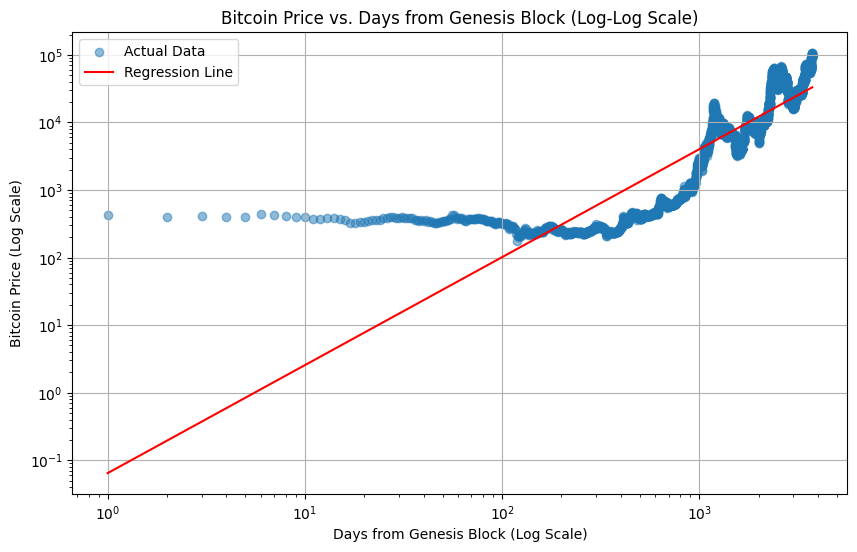

Estimated exponent n (slope): 1.5982125432481404
Intercept: -2.7440154954197267
Regression line equation (log-log scale):
log(price) = 1.5982 * log(days) + -2.7440

R-squared: 0.7594


In [26]:
# Perform linear regression
log_days = btc_data['Log_Days'].values
log_close = btc_data['Log_Close'].values

# Perform linear regression using NumPy's polyfit
coeffs = np.polyfit(log_days, log_close, 1)
slope, intercept = coeffs

# Calculate predicted log prices and actual prices
predicted_log_close = slope * log_days + intercept
predicted_close = np.exp(predicted_log_close)

# Plot Results
# Log-Log scatter plot of the actual data with regression line
plt.figure(figsize=(10, 6))
plt.scatter(log_days, log_close, alpha=0.5, label='Actual Data')
plt.plot(log_days, predicted_log_close, color='red', label='Regression Line')
plt.title('Log-Log Plot of Bitcoin Price with Regression Line')
plt.xlabel('Log(Days from Genesis Block)')
plt.ylabel('Log(Bitcoin Price)')
plt.legend()
plt.grid(True)
plt.show()

# Linear scale scatter plot with log-log axes
plt.figure(figsize=(10, 6))
plt.scatter(btc_data['Days'], btc_data['Close'], alpha=0.5, label='Actual Data')
plt.plot(btc_data['Days'], predicted_close, color='red', label='Regression Line')
plt.xscale('log')
plt.yscale('log')
plt.title('Bitcoin Price vs. Days from Genesis Block (Log-Log Scale)')
plt.xlabel('Days from Genesis Block (Log Scale)')
plt.ylabel('Bitcoin Price (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

# Output Results
print(f"Estimated exponent n (slope): {slope}")
print(f"Intercept: {intercept}")
print("Regression line equation (log-log scale):")
print(f"log(price) = {slope:.4f} * log(days) + {intercept:.4f}")

# Additional statistical analysis
from scipy import stats

# Calculate R-squared
r_squared = stats.pearsonr(log_days, log_close)[0]**2

print(f"\nR-squared: {r_squared:.4f}")

**Bitcoin Price Power Law Analysis: Insights and Conclusions**

**Research Objective**

We investigated the potential power-law relationship between Bitcoin's price and time since its inception, aiming to understand the long-term price dynamics of this pioneering cryptocurrency.

**Methodology**

Data Source: Yahoo Finance (yfinance)
Time Range: From Bitcoin's early days (September 2014) to present
Analysis Technique: Log-linear regression on time (days) and price

**Key Findings**

**Power Law Relationship**

Exponent (n): 1.5982

Indicates a super-linear growth pattern
Price increases faster than linear time progression
Suggests accelerating value appreciation over time



**Statistical Validation**

R-squared: 0.7594 (75.94%)

Strong correlation between time and price
Log-linear model explains a significant portion of price variation



**Regression Equation**

log(price) = 1.5982 * log(days) - 2.7440

Interpretation

Bitcoin demonstrates a non-linear price appreciation
Early-stage growth shows more dramatic price increases
The power-law relationship suggests inherent scaling mechanisms in cryptocurrency valuation

**Limitations**

Analysis starts from 2014, not the absolute earliest Bitcoin data
Complex market factors beyond time are not captured in this model
Past performance does not guarantee future trends

**Implications**

Provides a mathematical framework for understanding Bitcoin's long-term value proposition
Highlights the unique growth characteristics of digital assets
Offers insights into potential long-term investment strategies

**Future Research Directions**

Extend analysis with more granular time series data
Compare power-law dynamics across different cryptocurrencies
Incorporate additional market factors into the model
